## Problem Statement - 1

#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Reading the data

In [6]:
com = pd.read_csv("E:\\deeksha\\python\\data\\Company_Data.csv")

#### Performing EDA on data

In [7]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Checking Correlation

In [5]:
com.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
com.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

#### Plotting Heat Map

<AxesSubplot:>

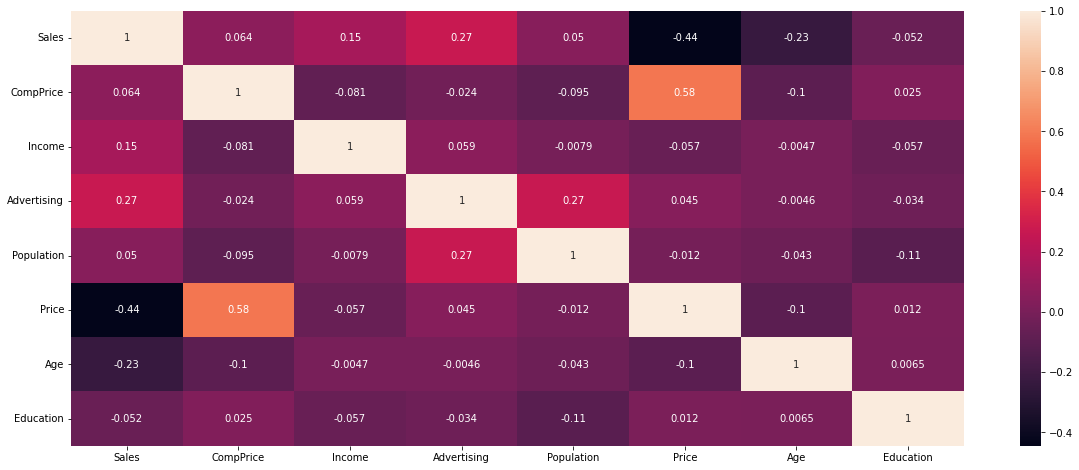

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (you can replace this with your own dataset)
data = com[["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education"]]

# # Create a heatmap
# sns.set(style="whitegrid")  # Optional: Set the style of the plot
plt.figure(figsize=(20, 8))  # Optional: Set the size of the plot
# sns.heatmap(data, annot=True, cmap="YlGnBu", fmt=".2f")
sns.heatmap(data.corr(),annot=True)

#### Here we are calculating median so that we can find high sales and low sales 

In [11]:
com['Sales'].median()

7.49

#### Here i have created new sales column on the basis of median values (if value is greater than median it is high sales (1) otherwise low sales(0))

In [12]:
com['target'] = np.where(com.Sales > com['Sales'].median(), 1, 0)

In [13]:
X = com.drop(["Sales","target"],axis=1)
y = com["target"]

####  Using 1 hot encoding to convert string to binary data

In [14]:
X = pd.get_dummies(X,columns=["ShelveLoc", "Urban", "US"],drop_first=True)
##  X = pd.get_dummies(X,columns(["ShelveLoc", "Urban", "US"]))

In [15]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [16]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: target, Length: 400, dtype: int32

####  Splitting data into training and testing data set

In [17]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#### Building Decision Tree Classifier using Entropy Criteria

In [19]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

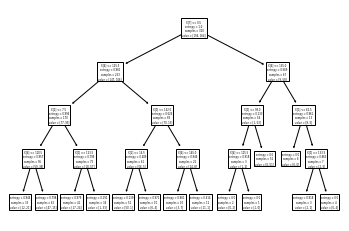

In [22]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);


#### Checking Columns

In [23]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [24]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

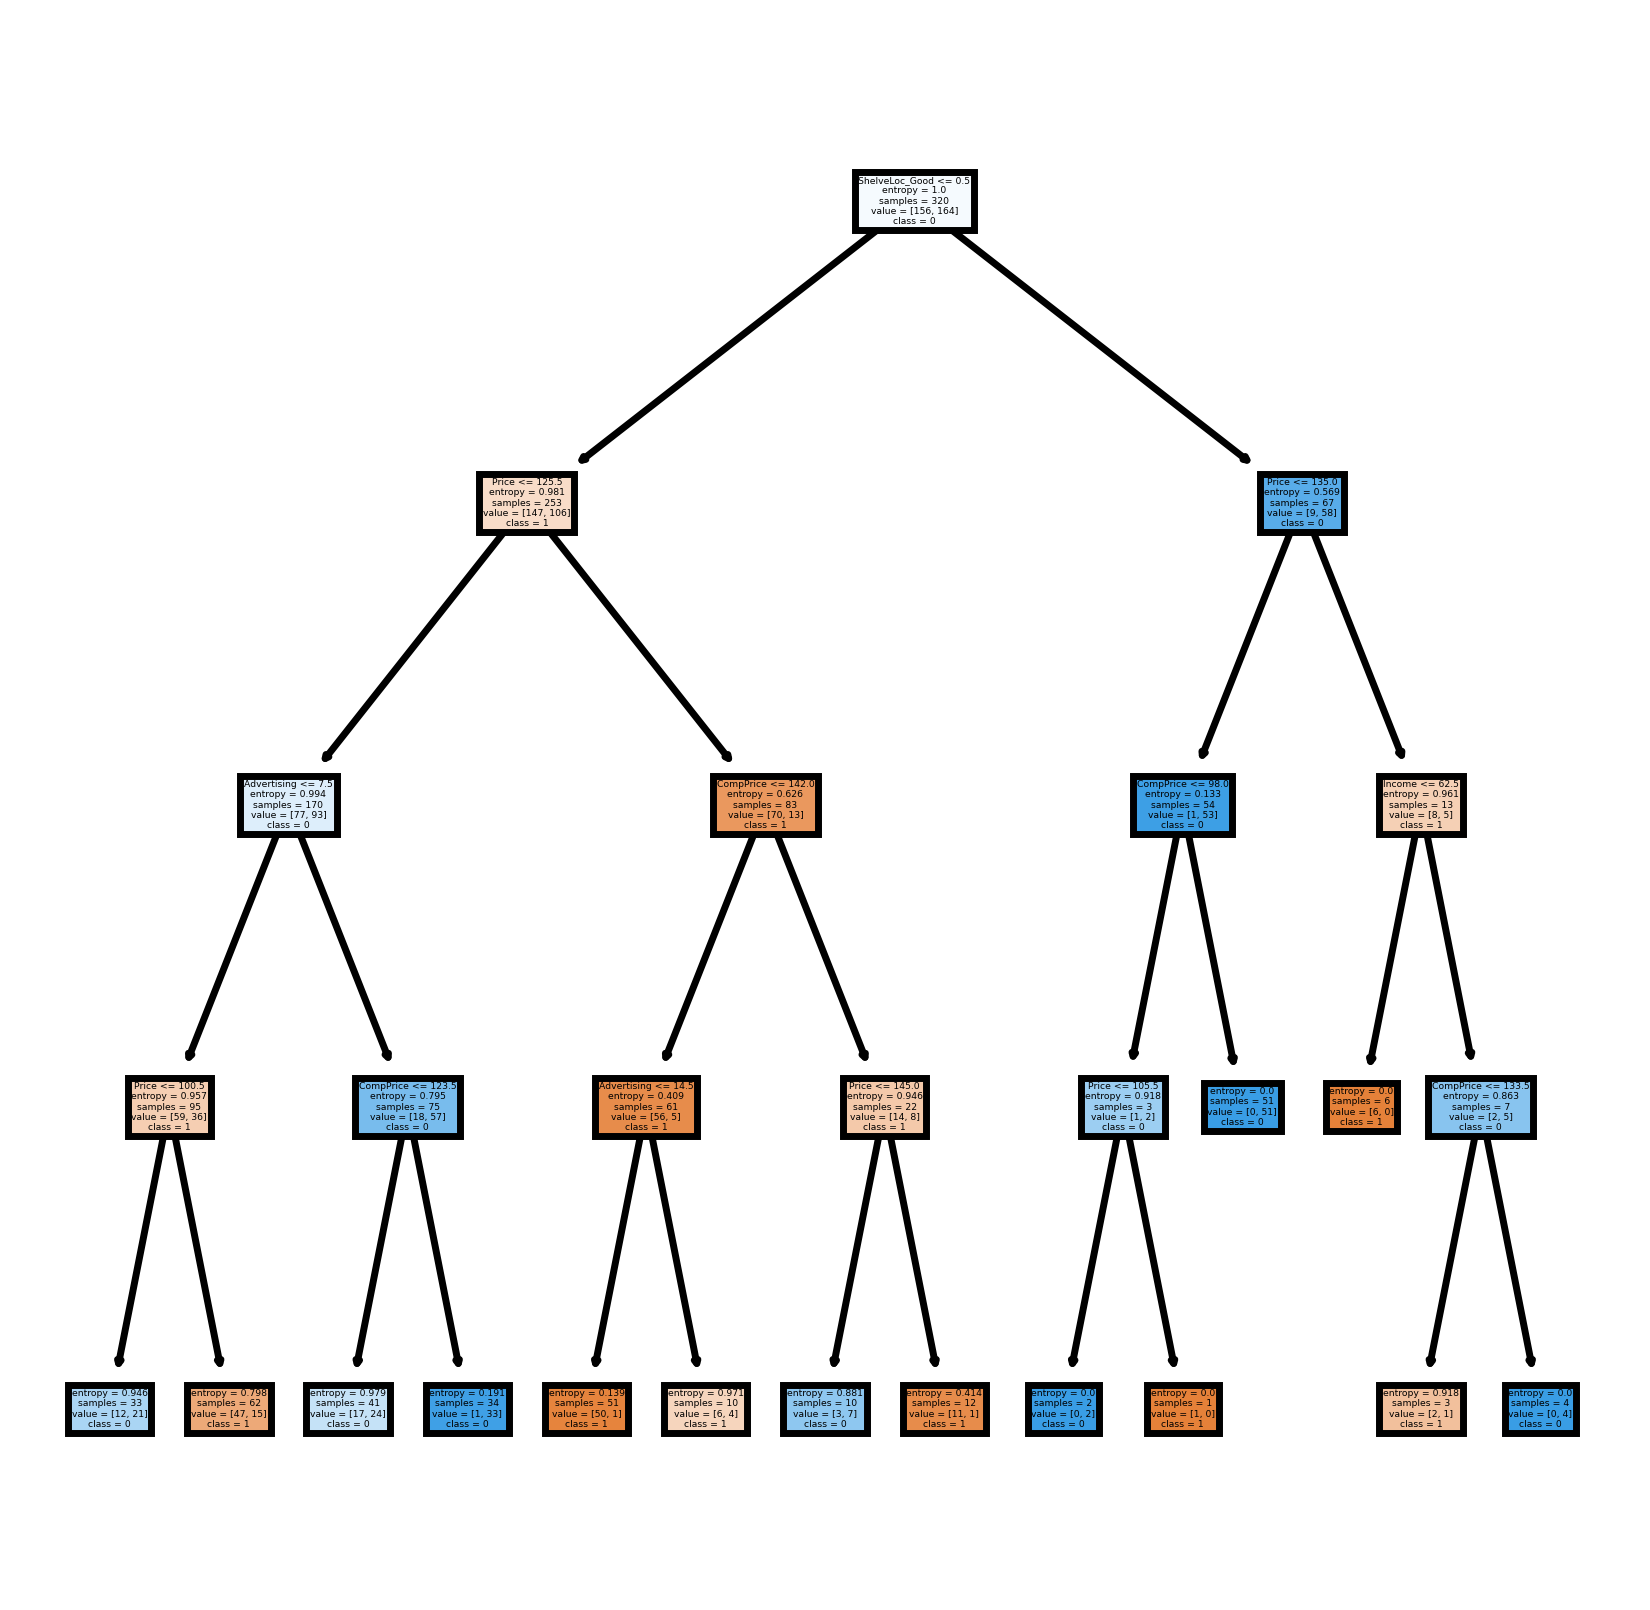

In [25]:
fn= X.columns
cn=['1','0' ]    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


#### Predicting on test data

In [26]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    45
0    35
dtype: int64

<AxesSubplot:>

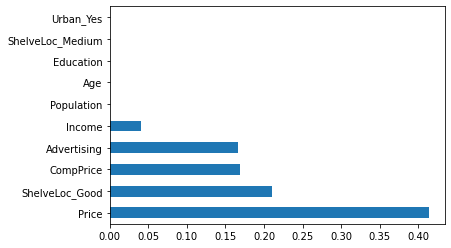

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh')

In [28]:
feat_importances.sort_values(ascending=False)

Price               0.413281
ShelveLoc_Good      0.210678
CompPrice           0.169104
Advertising         0.166388
Income              0.040549
Population          0.000000
Age                 0.000000
Education           0.000000
ShelveLoc_Medium    0.000000
Urban_Yes           0.000000
US_Yes              0.000000
dtype: float64

In [29]:
y_test.value_counts()

0    45
1    35
Name: target, dtype: int64

In [30]:
preds

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [31]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
target,,
0,29,16
1,6,29


In [32]:
preds,y_test

(array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]),
 132    1
 390    0
 310    1
 3      0
 248    0
       ..
 361    1
 197    0
 23     0
 54     0
 58     0
 Name: target, Length: 80, dtype: int32)

In [36]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
target,,
0,29,16
1,6,29


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [57]:
confusion_matrix

array([[29, 16],
       [ 6, 29]], dtype=int64)

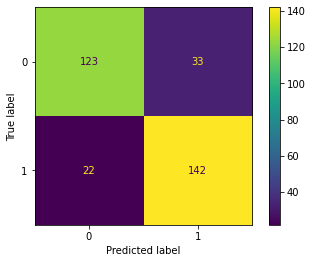

In [54]:
plot_confusion_matrix(model, X_train, y_train) 

#### Accuracy test

In [33]:
from sklearn.metrics import accuracy_score

np.mean(preds==y_test),accuracy_score(y_test,preds)

(0.725, 0.725)

In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.64
Recall: 0.83
